<div>
    <img src="../images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Introduction to Deep Learning </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[DSAIS]</a> MSc in Data Science & Artificial Intelligence Strategy <br/>
         Paris | © Saeed VARASTEH
    </span>
</div>

## Lecture 02 : First Model

In this lecture, we will see the main reasons why PyTorch makes it much easier and more intuitive to build a Deep Learning model in Python.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

---

### A Simple Regression Problem

Let's consider a simple and familiar problem: a linear regression with a single feature __x__!

$$ y = a * x + b $$


### Data Generation

Let’s start generating some synthetic data: we start with a vector of 100 points for our feature __x__.

Next, let’s split our synthetic data into train and test sets, shuffling the array of indices and using the first 80 shuffled points for training.

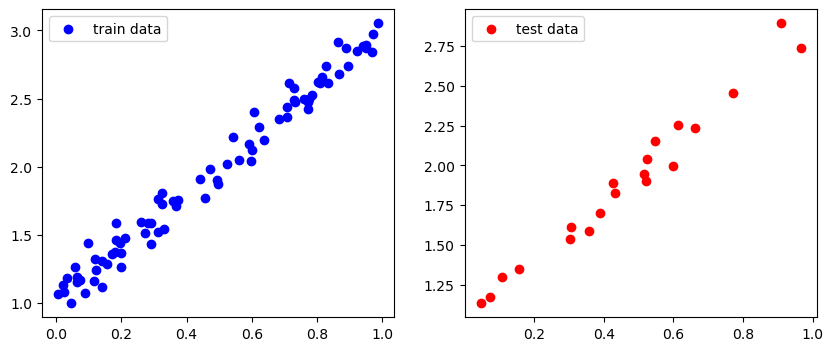

In [2]:
# Data Generation
X = np.random.rand(100, 1)
y = 2 * X + 1. + .1 * np.random.randn(100, 1)

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
test_idx = idx[80:]

# Generates train and test sets
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

# Visualize data
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].scatter(X_train,y_train, c="b", label="train data"); ax[0].legend();
ax[1].scatter(X_test,y_test, c="r", label="test data"); ax[1].legend();

<div class="alert-info">
We know that a = 2 and b = 1, but now let’s see how close we can get to the true values by using <b>gradient descent</b> and the 80 points in the training set.
</div>

---

### Loss

For a regression problem, the loss is given by the Mean Square Error (MSE), that is, the average of all squared differences between actual labels ($y$) and the model predictions ($\hat{y} = h_{\theta}(\boldsymbol{x})$). The goal is to minimize the loss value.

$$ \mathcal{L} = \frac{1}{2 m} \sum_{i=1}^m (\hat{y^i} - y^i)^2 = \frac{1}{2 m} \sum_{i=1}^m (ax^i + b - y^i)^2 $$

To change the value of this loss, we need to change the model parameters; i.e. __a__ and __b__.

### Gradient Descent: Update Rule

We use the gradients to update the parameters. Since we are trying to minimize our losses, we reverse the sign of the gradient for the update.

$$ a = a - \eta \frac{\partial \mathcal{L} } {\partial a} $$
$$ b = b - \eta \frac{\partial \mathcal{L} } {\partial b} $$

There is still another parameter (hyperparameter) to consider: __the learning rate__, denoted by the Greek letter __eta__ ($\eta$), which is the multiplicative factor that we need to apply to the gradient for the parameter update.

### Gradient Descent: The Gradients

A gradient is a partial derivative — why partial? Because one computes it with respect to (w.r.t.) a single parameter. We have two parameters, __a__ and __b__, so we must compute two partial derivatives.


$$ \frac{\partial \mathcal{L} } {\partial a} = \frac{1}{m} \sum_{i=1}^m x^i (\hat{y^i}-y^i)^2  $$
$$ \frac{\partial \mathcal{L} } {\partial b} = \frac{1}{m} \sum_{i=1}^m (\hat{y^i}-y^i)^2  $$

---

### Linear Regression in Numpy

Let's first using Numpy only. Then, you can fully appreciate how much PyTorch makes your life easier!

The initialization steps:

- Random initialization of parameters/weights (we have only two, a and b);
- Initialization of hyper-parameters (in our case, only learning rate and number of epochs);

The training steps:

- Compute model’s predictions — this is the forward pass.
- Compute the loss, using predictions and and labels and the appropriate loss function for the task at hand.
- Compute the gradients for every parameter.
- Update the parameters.

In [3]:
# Initializes parameters "a" and "b" randomly
a = np.random.randn(1)
b = np.random.randn(1)

print(a, b)

[-2.02514259] [0.18645431]


In [4]:
# Sets learning rate
lr = 1e-1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a * X_train + b 
    
    # How wrong is our model? That's the error! 
    error = yhat - y_train
    # It is a regression, so it computes mean squared error (MSE)
    loss = 0.5 * (error ** 2).mean()
    
    # Computes gradients for both "a" and "b" parameters
    a_grad = (X_train * error).mean()
    b_grad = error.mean()
    
    # Updates parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad
    
print(a, b)

[1.96752391] [1.02427697]


Just to make sure we haven’t done any mistakes in our code, we can use Scikit-Learn’s Linear Regression to fit the model and compare the coefficients.

In [5]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(X_train, y_train)
print(linr.coef_[0], linr.intercept_)

[1.96896447] [1.02354075]


---

### Let's do it in PyTorch!

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchviz import make_dot

torch.manual_seed(42)
device = 'cpu'

ModuleNotFoundError: No module named 'torchviz'

#### Loading Data

How do we go from Numpy’s arrays to PyTorch’s tensors?

Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors and and then we send them to the chosen device.

In [ ]:
X_train_tensor = torch.from_numpy(X_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

#### Parameters

How do we make a tensor a (trainable) parameter/weight?

The tensors require the computation of its gradients, so we can update their values (the parameters’ values. 

That’s what the `requires_grad=True` argument is good for. It tells PyTorch we want it to compute gradients for this tensor.

In [ ]:
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

#### Dynamic Computation Graph

In [7]:
yhat = a * X_train_tensor + b
error = yhat - y_train_tensor
loss = (error ** 2).mean()

NameError: name 'X_train_tensor' is not defined

In [8]:
make_dot(yhat)

NameError: name 'make_dot' is not defined

- __blue boxes__: these correspond to the tensors we use as parameters, the ones we’re asking PyTorch to compute gradients for;
- __gray box__: a Python operation that involves a gradient-computing tensor or its dependencies;
- __green box__: the same as the gray box, except it is the starting point for the computation of gradients (assuming the `backward()` method is called from the variable used to visualize the graph)— they are computed from the bottom-up in a graph.

<div class="alert-info">
If we plot graphs for the error (center) and loss (right) variables, the only difference between them and the first one is the number of intermediate steps (gray boxes).
</div>

Why don’t we have a box for our data __x__? The answer is: we do not compute gradients for it! So, even though there are more tensors involved in the operations performed by the computation graph, it only shows gradient-computing tensors and its dependencies.

#### Optimizer

An optimizer takes the parameters we want to update, the learning rate we want to use (and possibly many other hyper-parameters as well!) and performs the updates through its `step()` method.

In the code below, we create a Stochastic Gradient Descent (SGD) optimizer to update our parameters __a__ and __b__.

In [ ]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

lr = 1e-1
n_epochs = 1000

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a * X_train_tensor + b
    error = yhat - y_train_tensor
    loss = (error ** 2).mean()

    optimizer.zero_grad() # Telling PyTorch to let gradients go!

    loss.backward() # It computes all gradients for all learnable parameters
    
    optimizer.step() # To update the parameters
    
print(a, b)

<div class="alert-info">
    <b>Autograd</b> is PyTorch’s automatic differentiation package. Thanks to it, we don’t need to worry about partial derivatives, chain rule or anything like it. It means it computes all gradients for you. How? That’s what <code>backward()</code> is good for.
</div>

<div class="alert-danger">
Before computing the gradients you have to zero out gradients - Why? Because by default the gradients are accumulated. That is what <code>optimizer.zero_grad()</code> is good for.
</div>

#### PyTorch Loss

We now tackle the loss computation. As expected, PyTorch got us covered once again. There are many loss functions to choose from, depending on the task at hand. Since ours is a regression, we are using the Mean Square Error (MSE) loss.

Using PyTorch MSE loss, our code will look like this:

In [ ]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

lr = 1e-1
n_epochs = 1000

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a * X_train_tensor + b
    
    loss = loss_fn(yhat, y_train_tensor) # No more manual loss!

    optimizer.zero_grad()
    loss.backward()    
    optimizer.step()
    
print(a, b)

<div class="alert-warning">
Notice that nn.MSELoss actually creates a loss function for us — it is NOT the loss function itself. Moreover, you can specify a reduction method to be applied, that is, how do you want to aggregate the results for individual points — you can average them (reduction=’mean’) or simply sum them up (reduction=’sum’).
</div>

#### PyTorch Linear Module

We compute the predicted output ourselves. Let’s use PyTorch Linear Module instead!

In [ ]:
torch.manual_seed(42)

# Now we can create a Linear module and use it to compute the output
# Instead of our custom parameters, we use a Linear layer with single input and single output
model = nn.Linear(1, 1) # in_features, out_features, 
# We can also inspect its parameters using its state_dict()
print(model.state_dict())

lr = 1e-1
n_epochs = 1000

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    yhat = model(X_train_tensor) # No more manual prediction!
    
    loss = loss_fn(yhat, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()  # To calculate the gradients  
    optimizer.step()   # To update the model weights
    
print(model.state_dict())

#### Finally, The PyTorch Model

<div class="alert-success">
    In PyTorch, a model is represented by a regular Python class that inherits from the <b>Module</b> class.
</div>

The most fundamental methods it needs to implement are:

- `__init__(self)`: it defines the parts that make up the model —in our case, the `nn.Linear` module.
- `forward(self, x)`: it performs the actual computation, that is, it outputs a prediction, given the input __x__.

__Note:__ You should NOT call the `forward(x)` method, though. You should call the whole model itself, as in `model(x)` to perform a forward pass and output predictions.

Let’s build a proper (yet simple) model for our regression task:

In [ ]:
# Customize Linear Regression Class
class MyModel(nn.Module):
    # Constructor
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    
    # Prediction function
    def forward(self, x):
        # Computes the outputs / predictions
        return self.linear(x)

In [ ]:
torch.manual_seed(42)

# Now we can create a model and send it at once to the device
model = MyModel().to(device)

print(model.state_dict())

lr = 1e-1
n_epochs = 1000

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    model.train() # What is this?

    yhat = model(X_train_tensor)
    loss = loss_fn(yhat, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()    
    optimizer.step()
    
print(model.state_dict())

<div class="alert-danger">
    <b><span style='color:red'>IMPORTANT</span>: we need to send our model to the same device where the data is. If our data is made of GPU tensors, our model must “live” inside the GPU as well.</b>
</div>

<div class="alert-info">
    Moreover, we can get the current values for all parameters using our model’s <b>state_dict()</b> method.
</div>

<div class="alert-info">
The only purpose of <b>model.train()</b> is to set the model to training mode. Why is this important? Some models may use mechanisms like Dropout, for instance, which have distinct behaviors in training and evaluation phases.
</div>

<div class="alert-success">
In PyTorch, every method that ends with an underscore (_) makes changes in-place, meaning, they will modify the underlying variable
</div>

---